In [ ]:
1. 깃허브 자신의 계정에 수업과 숙제를 올린 소스코드만 참조가능

(그 외의 참조는 부정으로 간주 F처리)



# 데이터 로드
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(url, names=columns)

# 데이터 확인
print(data.head())

2. 해당 소스를 이용하여 ML 분류 RF, LR, DT

3. 해당 소스를 이용하여 FCNN

4. 해당 소스를 이용하여 CNN

5. 모든 소스에는 F1값 및 confusion matrix 표시

In [171]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing
import seaborn as sns


In [172]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv(url, names=columns)
print(data.head())

le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [173]:
X = data.drop('class', axis=1)
y = data['class']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"랜덤 포레스트 정확도: {rf_acc:.2f}")

랜덤 포레스트 정확도: 0.97


정확도 (RF): 0.9739884393063584
              precision    recall  f1-score   support

         acc       0.99      0.90      0.94        83
        good       0.65      1.00      0.79        11
       unacc       0.99      1.00      1.00       235
       vgood       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.91      0.96      0.92       346
weighted avg       0.98      0.97      0.98       346



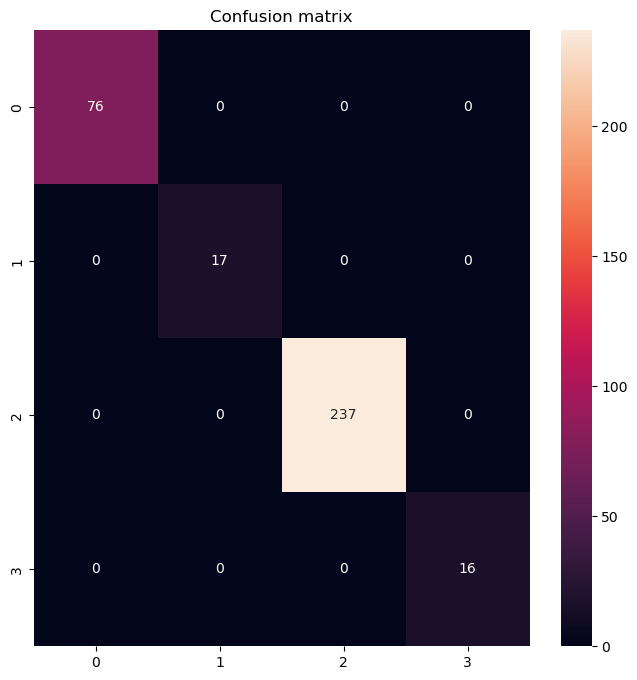

In [181]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'정확도 (RF): {accuracy}')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


conf_matrix = confusion_matrix(rf_pred, rf_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion matrix")

plt.show()

In [177]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print(f"로지스틱 회귀 정확도: {lr_acc:.2f}")

로지스틱 회귀 정확도: 0.66


정확도 (LR): 0.6589595375722543
              precision    recall  f1-score   support

         acc       0.26      0.13      0.18        83
        good       0.00      0.00      0.00        11
       unacc       0.72      0.92      0.81       235
       vgood       0.00      0.00      0.00        17

    accuracy                           0.66       346
   macro avg       0.25      0.26      0.25       346
weighted avg       0.55      0.66      0.59       346



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


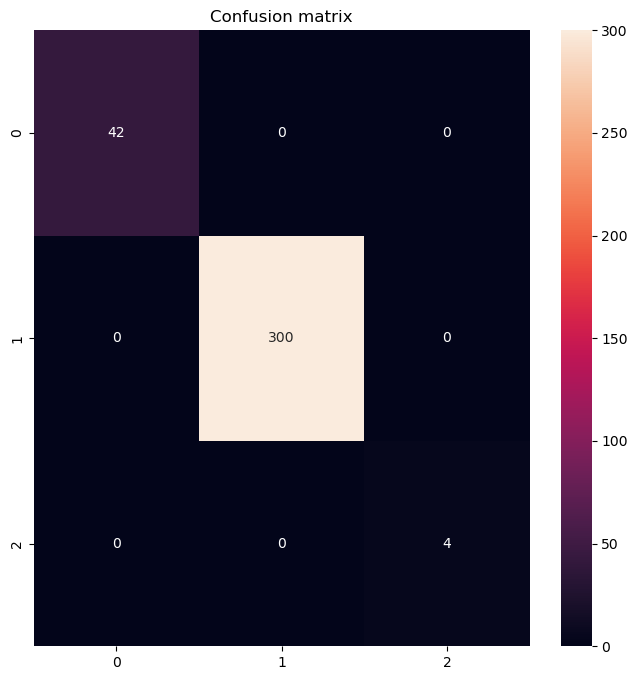

In [182]:
y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'정확도 (LR): {accuracy}')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

conf_matrix = confusion_matrix(lr_pred, lr_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion matrix")

plt.show()


In [179]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print(f"결정 트리 정확도: {dt_acc:.2f}")

결정 트리 정확도: 0.97


정확도 (DT): 0.9739884393063584
              precision    recall  f1-score   support

         acc       0.97      0.92      0.94        83
        good       0.62      0.91      0.74        11
       unacc       1.00      1.00      1.00       235
       vgood       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.90      0.94      0.91       346
weighted avg       0.98      0.97      0.98       346



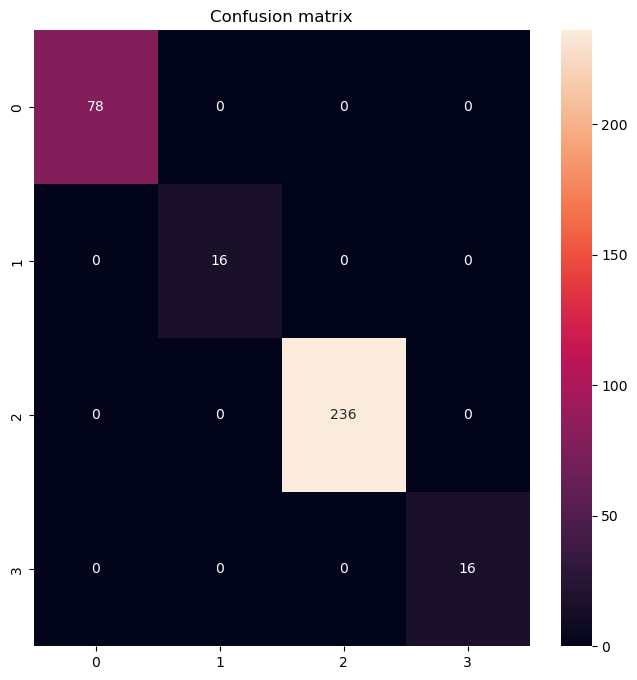

In [183]:
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'정확도 (DT): {accuracy}')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

conf_matrix = confusion_matrix(dt_pred, dt_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion matrix")

plt.show()
